In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.image as mpimg
import cartopy.crs as ccrs

In [2]:
import csv
import os
import sys

dat_files_path ="F:/Dissertation/Datasets/dat_files"
csv_files_path ="F:/Dissertation/Datasets/CSV Files"

files = os.listdir(dat_files_path)
datContent = []
pressure_df = pd.DataFrame()

for file_name in files:
    txt = file_name.split(".")
    lines = []
    
    with open(dat_files_path + '/' + file_name, 'r') as rd_file:
        for line in rd_file:
            line = line.strip().split()
            lines.append(line)
        
        df = pd.DataFrame(lines)
        grp_df = pd.DataFrame([y.values.ravel() for x , y in df.groupby(np.arange(len(df))//37)])
        grp_df = grp_df.astype(np.int64)
        grp_df *= 0.01
        grp_df["year"] = txt[1]
        grp_df["year"] = pd.to_numeric(grp_df["year"])
        pressure_df = pressure_df.append(grp_df)

pressure_df.loc[:, pressure_df.columns != 'year'] = pressure_df.loc[:, pressure_df.columns != 'year'].apply(np.int64)
pressure_df.head()

0     1     2     3     4     5     6     7     8     9  ...  2692  \
0  1015  1015  1015  1015  1015  1015  1015  1015  1015  1015  ...  1011   
1  1019  1019  1019  1019  1019  1019  1019  1019  1019  1019  ...  1012   
2  1022  1022  1022  1022  1022  1022  1022  1022  1022  1022  ...  1012   
3  1019  1019  1019  1019  1019  1019  1019  1019  1019  1019  ...  1012   
4  1015  1015  1015  1015  1015  1015  1015  1015  1015  1015  ...  1012   

   2693  2694  2695  2696  2697  2698  2699  2700  year  
0  1011  1011  1011  1011  1011  1011  1011  1011  1948  
1  1012  1012  1011  1011  1012  1012  1012  1012  1948  
2  1012  1012  1012  1012  1012  1012  1011  1011  1948  
3  1012  1012  1011  1011  1011  1011  1011  1011  1948  
4  1012  1012  1011  1011  1011  1011  1011  1011  1948  

[5 rows x 2702 columns]

In [3]:
pressure_df.shape

(18263, 2702)

In [4]:
longitude_names=["90W","87.5W", "85W", "82.5W", "80W", "77.5W", "75W", "72.5W", "70W", "67.5W",
          "65W", "62.5W", "60W", "57.5W", "55W", "52.5W", "50W", "47.5W", "45W", 
           "42.5W", "40W", "37.5W", "35W", "32.5W", "30W", "27.5W", 
           "25W", "22.5W", "20W", "17.5W", "15W", "12.5W", "10W", "7.5W", 
           "5W", "2.5W", "0W", "2.5E", "5E", "7.5E", "10E", "12.5E", 
           "15E", "17.5E", "20E", "22.5E", "25E", "27.5E", "30E", "32.5E", "35E", "37.5E", 
           "40E", "42.5E", "45E", "47.5E", "50E", "52.5E", "55E", "57.5E", 
           "60E", "62.5E", "65E", "67.5E", "70E", "72.5E", "75E", "77.5E", "80E", "82.5E", "85E", "87.5E", "90E"]
latitude_names = ["90N","87.5N", "85N", "82.5N", "80N", "77.5N", "75N", "72.5N", "70N", "67.5N",
          "65N", "62.5N", "60N", "57.5N", "55N", "52.5N", "50N", "47.5N", "45N", 
           "42.5N", "40N", "37.5N", "35N", "32.5N", "30N", "27.5N", 
           "25N", "22.5N", "20N", "17.5N", "15N", "12.5N", "10N", "7.5N", 
           "5N", "2.5N", "0N"]

In [5]:
col_names = []
for lt_name in latitude_names:
    for lng_name in longitude_names:
        col_names.append(lt_name +'_'+ lng_name)

col_names.append('year')
pressure_df.columns = col_names
pressure_df.reset_index(drop=True)        
pressure_df.head()

90N_90W  90N_87.5W  90N_85W  90N_82.5W  90N_80W  90N_77.5W  90N_75W  \
0     1015       1015     1015       1015     1015       1015     1015   
1     1019       1019     1019       1019     1019       1019     1019   
2     1022       1022     1022       1022     1022       1022     1022   
3     1019       1019     1019       1019     1019       1019     1019   
4     1015       1015     1015       1015     1015       1015     1015   

   90N_72.5W  90N_70W  90N_67.5W  ...  0N_70E  0N_72.5E  0N_75E  0N_77.5E  \
0       1015     1015       1015  ...    1011      1011    1011      1011   
1       1019     1019       1019  ...    1012      1012    1012      1011   
2       1022     1022       1022  ...    1012      1012    1012      1012   
3       1019     1019       1019  ...    1012      1012    1012      1011   
4       1015     1015       1015  ...    1012      1012    1012      1011   

   0N_80E  0N_82.5E  0N_85E  0N_87.5E  0N_90E  year  
0    1011      1011    1011      1011    1011  1948  
1    1011      1012    1012      1012    1012  1948  
2    1012      1012    1012      1011    1011  1948  
3    1011      1011    1011      1011    1011  1948  
4    1011      1011    1011      1011    1011  1948  

[5 rows x 2702 columns]

Function for checking Leap Year

In [6]:
def check_leap_year(year):
    if (year % 4) == 0:
        if (year % 100) == 0:
            if (year % 400) == 0:
                return True
            else:
                return False
        else:
            return True
    else:
        return False

In [7]:
def leap_yr_df(lines, month):
    cols = ['year']
    ly_df = pd.DataFrame(lines)
    otherCols = [i for i in range(1, len(ly_df.columns))]
    cols.extend(otherCols)
    ly_df.columns = cols
    ly_df["year"] = pd.to_numeric(ly_df["year"])
    dt_df = ly_df.loc[:, ly_df.columns != 'year']
    ly_df = pd.melt(ly_df, id_vars =['year'], value_vars =[i for i in range(1, len(ly_df.columns))])
    cols2 = ["year", "day", "gwl_type"]
    ly_df.columns = cols2
    ly_df.reset_index()
    ly_df["day"] = pd.to_numeric(ly_df["day"])
    ly_df["month"] = month
    ly_df["year"] = pd.to_datetime(ly_df[['year', 'month', 'day']])
    return ly_df

In [8]:
import datetime

gwl_files_path ="F:/Dissertation/Datasets/gwl"

files = os.listdir(gwl_files_path)

def convert_gwl_dat_files(file_name, month):
    lines = []
    if month == 2:
        t_lines = []
        gwl_df = pd.DataFrame()
        leap_years = []
        with open(gwl_files_path + '/' + file_name, 'r') as re_file:
            for line in re_file:
                line = line.strip().split()
                year = pd.to_numeric(line[0])
                if ((year >= 1881) and (year < 1948)):
                    continue
                if check_leap_year(year):
                    leap_years.append(line)
                else:
                    t_lines.append(line)
            gwl_df = gwl_df.append(leap_yr_df(leap_years, month))
            gwl_df = gwl_df.append(leap_yr_df(t_lines, month))
    else:
        with open(gwl_files_path + '/' + file_name, 'r') as re_file:
            for line in re_file:
                line = line.strip().split()
                lines.append(line)
            cols = ['year']
            gwl_df = pd.DataFrame(lines)
            otherCols = [i for i in range(1, len(gwl_df.columns))]
            cols.extend(otherCols)
            gwl_df.columns = cols
            gwl_df["year"] = pd.to_numeric(gwl_df["year"])
            index_names = gwl_df[(gwl_df['year'] >= 1881) & (gwl_df['year'] < 1948)].index
            gwl_df.drop(index_names, inplace = True)
            dt_df = gwl_df.loc[:, gwl_df.columns != 'year']
            gwl_df = pd.melt(gwl_df, id_vars =['year'], value_vars =[i for i in range(1, len(gwl_df.columns))])
            cols2 = ["year", "day", "gwl_type"]
            gwl_df.columns = cols2
            gwl_df.reset_index()
            gwl_df["day"] = pd.to_numeric(gwl_df["day"])
            gwl_df['month'] = month
            gwl_df["year"] = pd.to_datetime(gwl_df[['year', 'month', 'day']])    
    return gwl_df

In [9]:
master_gwl_df = pd.DataFrame()
for file_name in files:
    mon_txt = os.path.splitext(file_name)[0]  
    month = pd.to_numeric(mon_txt[-2:])
    gt_df = convert_gwl_dat_files(file_name, month)
    master_gwl_df = master_gwl_df.append(gt_df)
    
master_gwl_df.rename(columns = {'year': 'date'}, inplace = True)    
master_gwl_df = master_gwl_df.sort_values(by="date")   
master_gwl_df.drop(['day', 'month'], axis=1, inplace=True)
master_gwl_df.reset_index(drop=True, inplace=True)

In [10]:
pressure_df.reset_index(drop=True, inplace=True)
master_df = pd.DataFrame()
master_df = pd.concat([pressure_df, master_gwl_df], ignore_index=False, axis=1)
master_df.head()

90N_90W  90N_87.5W  90N_85W  90N_82.5W  90N_80W  90N_77.5W  90N_75W  \
0     1015       1015     1015       1015     1015       1015     1015   
1     1019       1019     1019       1019     1019       1019     1019   
2     1022       1022     1022       1022     1022       1022     1022   
3     1019       1019     1019       1019     1019       1019     1019   
4     1015       1015     1015       1015     1015       1015     1015   

   90N_72.5W  90N_70W  90N_67.5W  ...  0N_75E  0N_77.5E  0N_80E  0N_82.5E  \
0       1015     1015       1015  ...    1011      1011    1011      1011   
1       1019     1019       1019  ...    1012      1011    1011      1012   
2       1022     1022       1022  ...    1012      1012    1012      1012   
3       1019     1019       1019  ...    1012      1011    1011      1011   
4       1015     1015       1015  ...    1012      1011    1011      1011   

   0N_85E  0N_87.5E  0N_90E  year       date  gwl_type  
0    1011      1011    1011  1948 1948-01-01        Wz  
1    1012      1012    1012  1948 1948-01-02        Wz  
2    1012      1011    1011  1948 1948-01-03        Wz  
3    1011      1011    1011  1948 1948-01-04        Wz  
4    1011      1011    1011  1948 1948-01-05        Wz  

[5 rows x 2704 columns]

In [10]:
pressure_df.to_csv(csv_files_path + "/pressure_data.csv", header=True, index=False)
master_gwl_df.to_csv(csv_files_path + "/gwl_types.csv", header=True, index=False)
master_df.to_csv(csv_files_path + "/processed_pressure_data.csv", header=True, index=False)

In [11]:
mlp_df = pressure_df.loc[:, pressure_df.columns != 'year']

In [12]:
master_df['gwl_type'].value_counts()

Wz      2784
BM      1669
HM      1287
Wa      1095
NWz      900
TrW      860
TrM      842
SWz      674
HB       608
HFa      577
SWa      548
Ws       500
Ww       479
Nz       469
TB       426
HNa      415
NWa      411
TM       402
SEa      370
HNz      352
HNFz     340
NEz      337
Sa       320
NEa      304
HFz      297
HNFa     256
SEz      221
š        200
Sz       168
Na       152
Name: gwl_type, dtype: int64

In [13]:
def get_avg_array(gwl_type):
    gwl_data = master_df.loc[master_df['gwl_type'] == gwl_type]
    avg = (gwl_data[mlp_df.columns].mean()).astype(np.int64)
    avg_arr = avg.to_numpy()
    grid_arr = np.reshape(avg_arr, (-1, 73))
    Z = np.flip(grid_arr, axis=0)
    return Z

In [14]:
from scipy.ndimage.filters import gaussian_filter
import scipy.ndimage
import cartopy.feature as cfeature

slp_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                  'rightside_up': True, 'use_clabeltext': True}

def get_ctr_plt(gwl_type):
    fig = plt.figure(1, figsize=(11., 9.))
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
    ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], crs=ccrs.PlateCarree())
    extent=[-90.0, 90.0, 0, 90]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    slp = get_avg_array(gwl_type)
    xlist = np.linspace(-90, 90, 73)
    ylist = np.linspace(0, 90, 37)
    levels = np.linspace(0, 90, 10)
    lons, lats = np.meshgrid(xlist, ylist)
    
    ax.contour(xlist, ylist, slp)
    ax.coastlines()
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    contour = plt.contour(lons, lats, slp, 16, transform=ccrs.PlateCarree())
    return contour

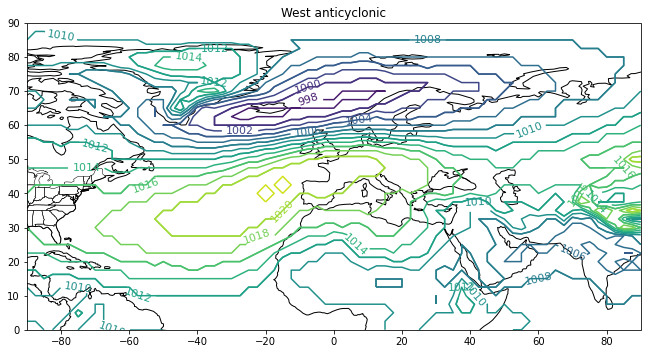

In [15]:
contour = get_ctr_plt('Wa')
plt.clabel(contour, **slp_clabels)
plt.title('West anticyclonic')
plt.show()

Text(0.5, 1.0, 'West cyclonic')

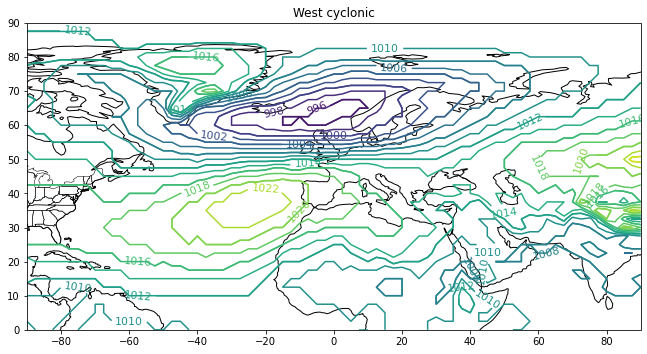

In [16]:
contour = get_ctr_plt('Wz')
plt.clabel(contour, **slp_clabels)
plt.title('West cyclonic')

Text(0.5, 1.0, 'Southern West')

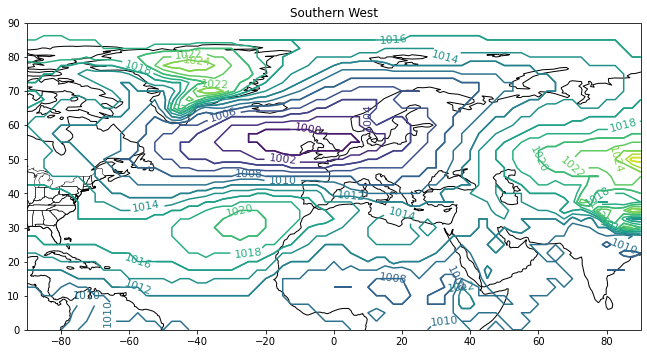

In [17]:
contour = get_ctr_plt('Ws')
plt.clabel(contour, **slp_clabels)
plt.title('Southern West')

Text(0.5, 1.0, 'Angleformed West')

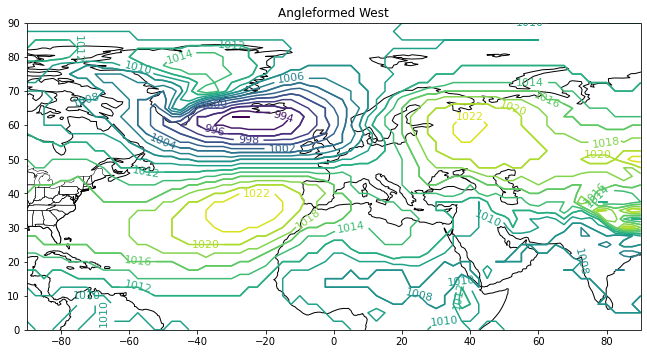

In [18]:
contour = get_ctr_plt('Ww')
plt.clabel(contour, **slp_clabels)
plt.title('Angleformed West')

Text(0.5, 1.0, 'Southwest anticyclonic')

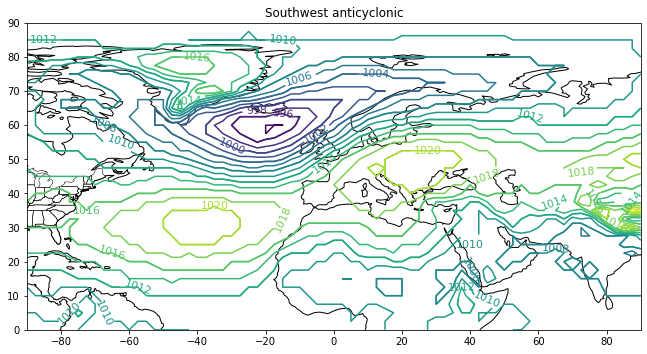

In [19]:
contour = get_ctr_plt('SWa')
plt.clabel(contour, **slp_clabels)
plt.title('Southwest anticyclonic')

Text(0.5, 1.0, 'Southwest cyclonic')

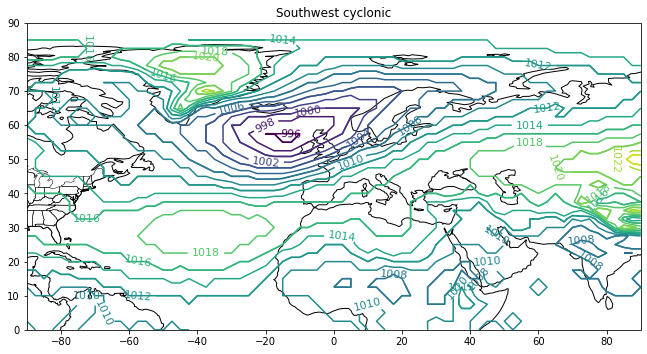

In [20]:
contour = get_ctr_plt('SWz')
plt.clabel(contour, **slp_clabels)
plt.title('Southwest cyclonic')

Text(0.5, 1.0, 'Northwest anticyclonic')

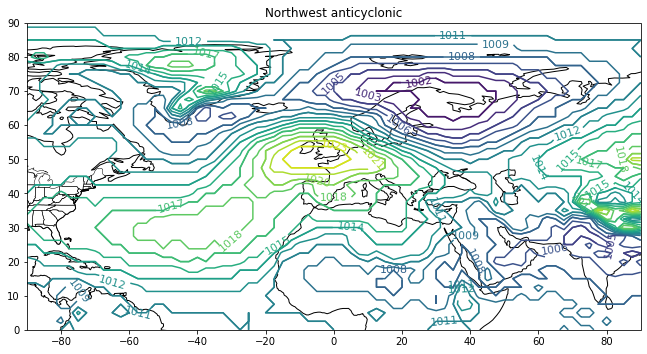

In [21]:
contour = get_ctr_plt('NWa')
plt.clabel(contour, **slp_clabels)
plt.title('Northwest anticyclonic')

Text(0.5, 1.0, 'Northwest cyclonic')

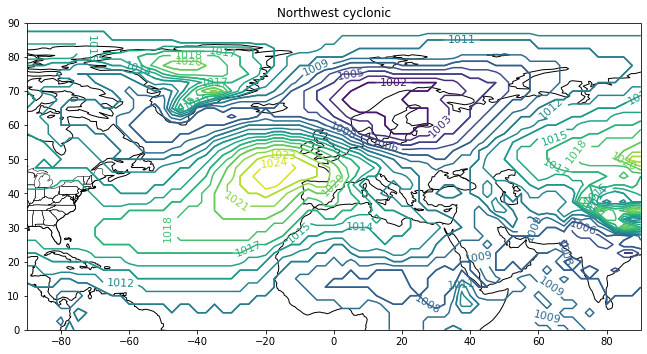

In [22]:
contour = get_ctr_plt('NWz')
plt.clabel(contour, **slp_clabels)
plt.title('Northwest cyclonic')

Text(0.5, 1.0, 'Central European high')

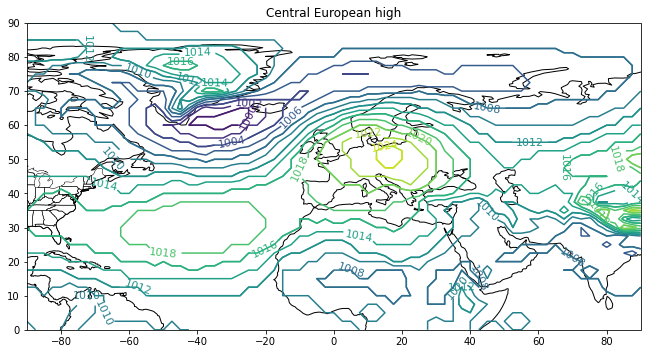

In [23]:
contour = get_ctr_plt('HM')
plt.clabel(contour, **slp_clabels)
plt.title('Central European high')

Text(0.5, 1.0, 'Central European ridge')

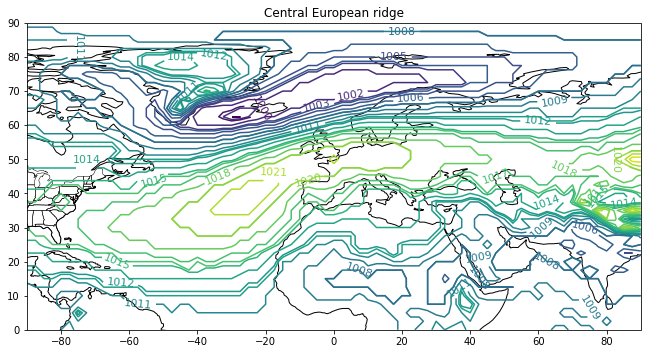

In [24]:
contour = get_ctr_plt('BM')
plt.clabel(contour, **slp_clabels)
plt.title('Central European ridge')

Text(0.5, 1.0, 'Central European low')

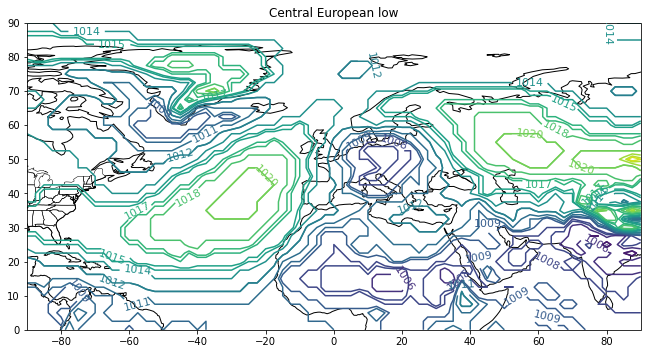

In [25]:
contour = get_ctr_plt('TM')
plt.clabel(contour, **slp_clabels)
plt.title('Central European low')

Text(0.5, 1.0, 'North anticyclonic')

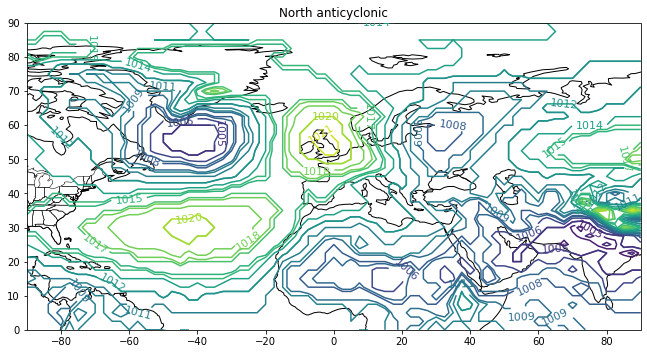

In [26]:
contour = get_ctr_plt('Na')
plt.clabel(contour, **slp_clabels)
plt.title('North anticyclonic')

Text(0.5, 1.0, 'North cyclonic')

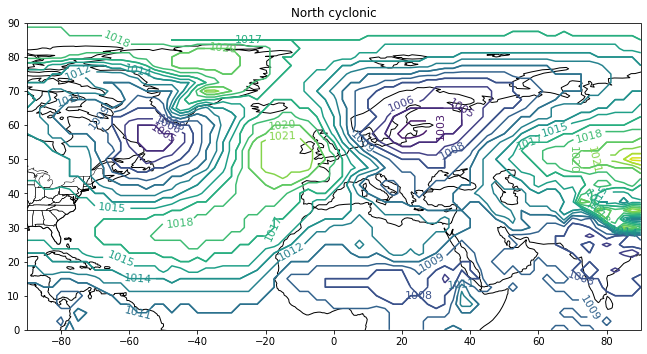

In [27]:
contour = get_ctr_plt('Nz')
plt.clabel(contour, **slp_clabels)
plt.title('North cyclonic')

Text(0.5, 1.0, 'North, Iceland high, anticyclonic')

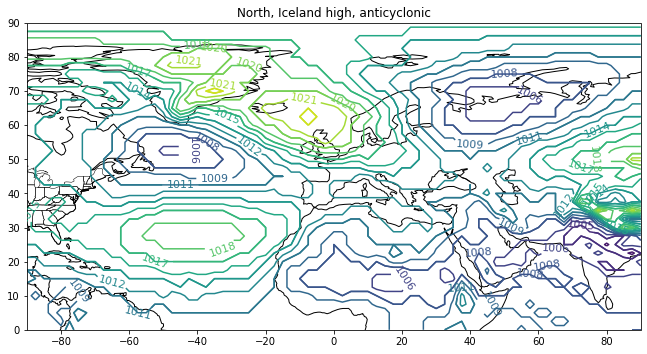

In [28]:
contour = get_ctr_plt('HNa')
plt.clabel(contour, **slp_clabels)
plt.title('North, Iceland high, anticyclonic')

Text(0.5, 1.0, 'North, Iceland high, cyclonic')

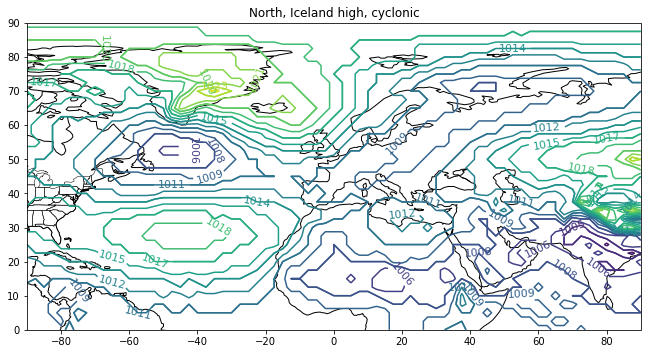

In [29]:
contour = get_ctr_plt('HNz')
plt.clabel(contour, **slp_clabels)
plt.title('North, Iceland high, cyclonic')

Text(0.5, 1.0, 'British Isles')

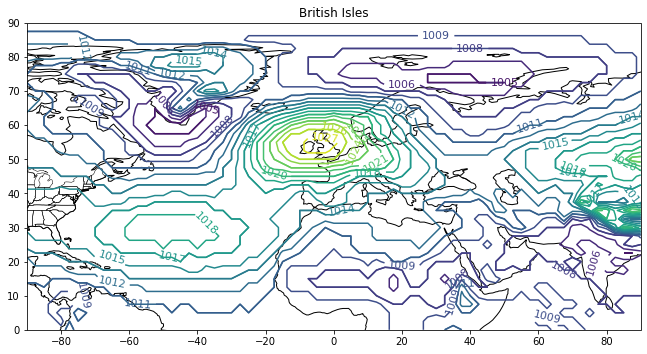

In [30]:
contour = get_ctr_plt('HB')
plt.clabel(contour, **slp_clabels)
plt.title('British Isles')

Text(0.5, 1.0, 'Central European trough')

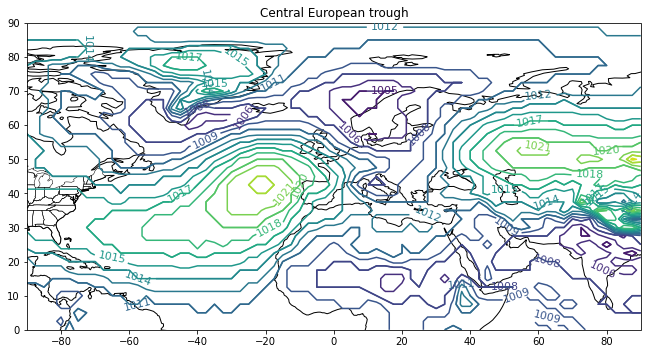

In [31]:
contour = get_ctr_plt('TrM')
plt.clabel(contour, **slp_clabels)
plt.title('Central European trough')

Text(0.5, 1.0, 'North-East anticyclonic')

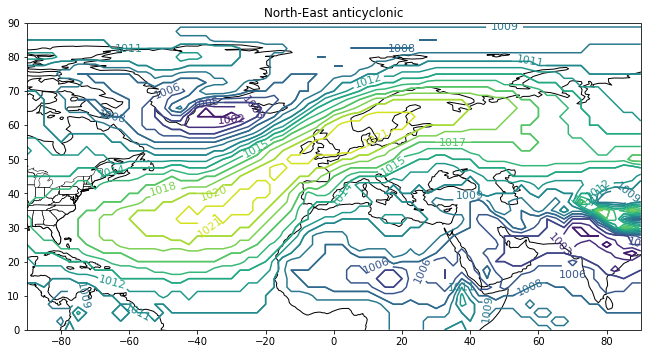

In [32]:
contour = get_ctr_plt('NEa')
plt.clabel(contour, **slp_clabels)
plt.title('North-East anticyclonic')

Text(0.5, 1.0, 'North-East cyclonic')

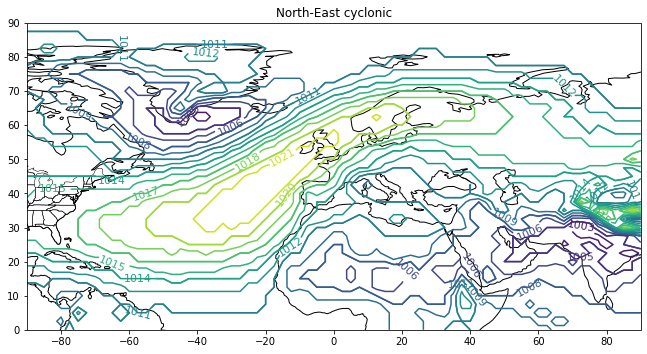

In [33]:
contour = get_ctr_plt('NEz')
plt.clabel(contour, **slp_clabels)
plt.title('North-East cyclonic')

Text(0.5, 1.0, 'Fennoscandian high anticyclonic')

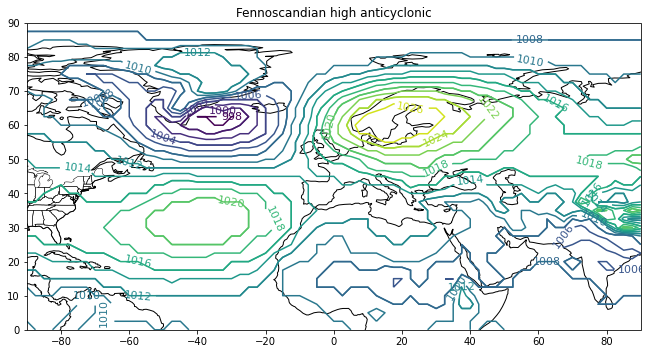

In [34]:
contour = get_ctr_plt('HFa')
plt.clabel(contour, **slp_clabels)
plt.title('Fennoscandian high anticyclonic')

Text(0.5, 1.0, 'Fennoscandian high cyclonic')

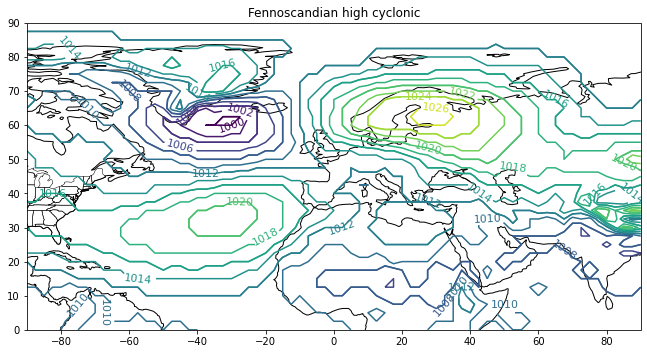

In [35]:
contour = get_ctr_plt('HFz')
plt.clabel(contour, **slp_clabels)
plt.title('Fennoscandian high cyclonic')

Text(0.5, 1.0, 'Norwegian Sea - Fennoscandian high anticyclonic')

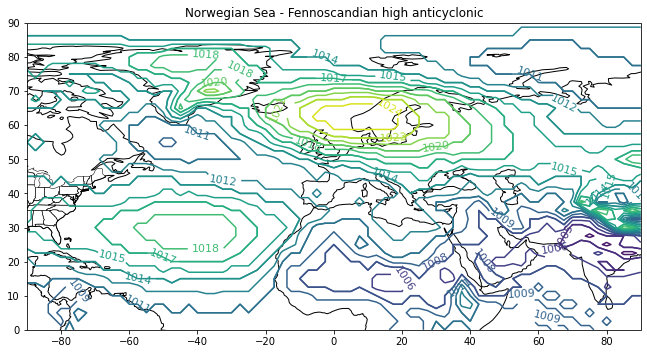

In [36]:
contour = get_ctr_plt('HNFa')
plt.clabel(contour, **slp_clabels)
plt.title('Norwegian Sea - Fennoscandian high anticyclonic')

Text(0.5, 1.0, 'Norwegian Sea - Fennoscandian high cyclonic')

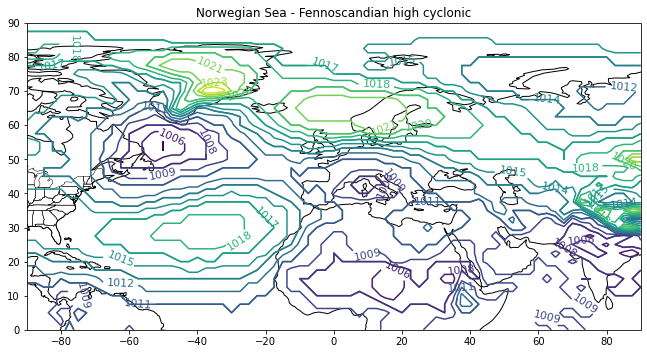

In [37]:
contour = get_ctr_plt('HNFz')
plt.clabel(contour, **slp_clabels)
plt.title('Norwegian Sea - Fennoscandian high cyclonic')

Text(0.5, 1.0, 'Southeast anticyclonic')

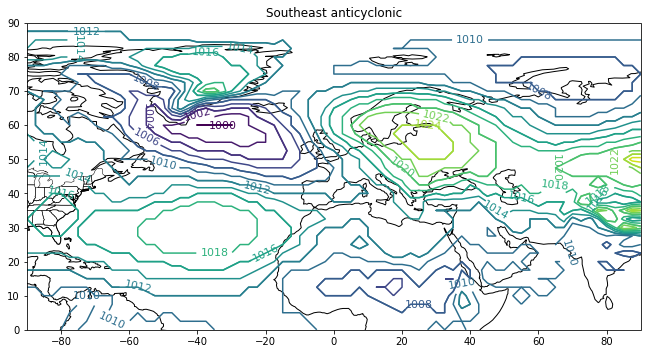

In [38]:
contour = get_ctr_plt('SEa')
plt.clabel(contour, **slp_clabels)
plt.title('Southeast anticyclonic')

Text(0.5, 1.0, 'Southeast cyclonic')

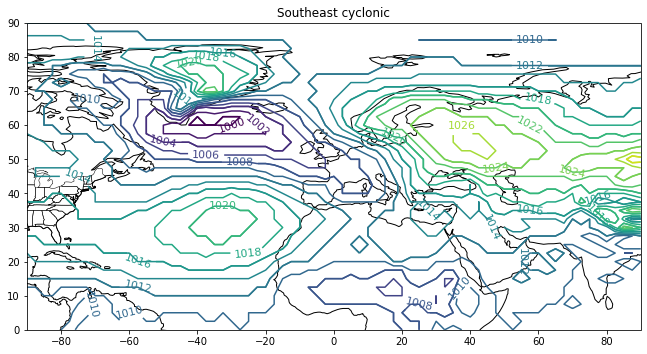

In [39]:
contour = get_ctr_plt('SEz')
plt.clabel(contour, **slp_clabels)
plt.title('Southeast cyclonic')

Text(0.5, 1.0, 'South anticyclonic')

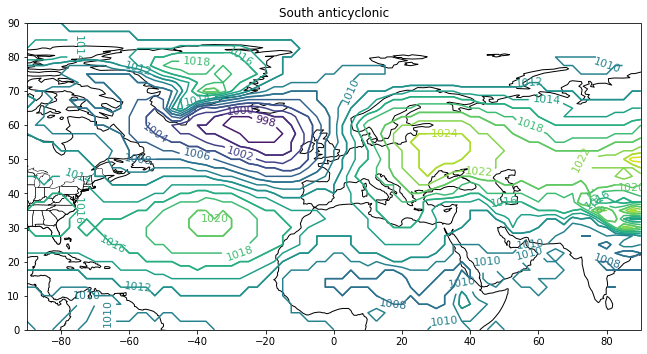

In [40]:
contour = get_ctr_plt('Sa')
plt.clabel(contour, **slp_clabels)
plt.title('South anticyclonic')

Text(0.5, 1.0, 'South cyclonic')

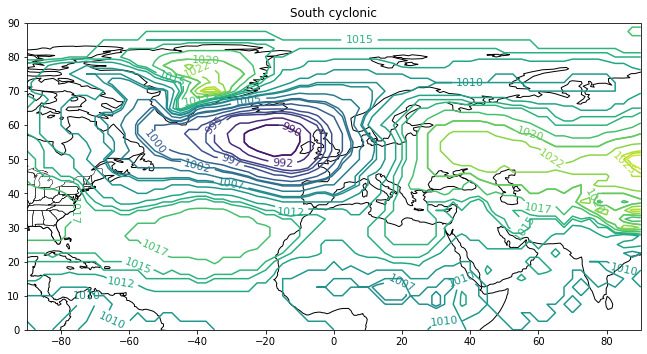

In [41]:
contour = get_ctr_plt('Sz')
plt.clabel(contour, **slp_clabels)
plt.title('South cyclonic')

Text(0.5, 1.0, 'British Isles low')

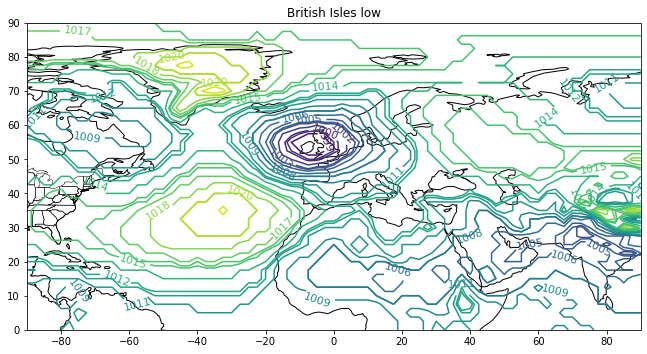

In [42]:
contour = get_ctr_plt('TB')
plt.clabel(contour, **slp_clabels)
plt.title('British Isles low')

Text(0.5, 1.0, 'Western European trough')

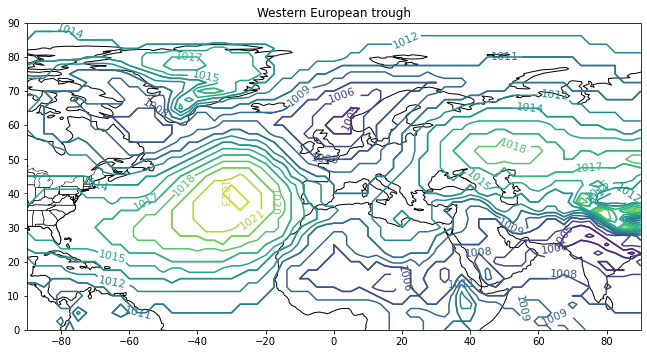

In [43]:
contour = get_ctr_plt('TrW')
plt.clabel(contour, **slp_clabels)
plt.title('Western European trough')

Text(0.5, 1.0, 'Unclassifiable')

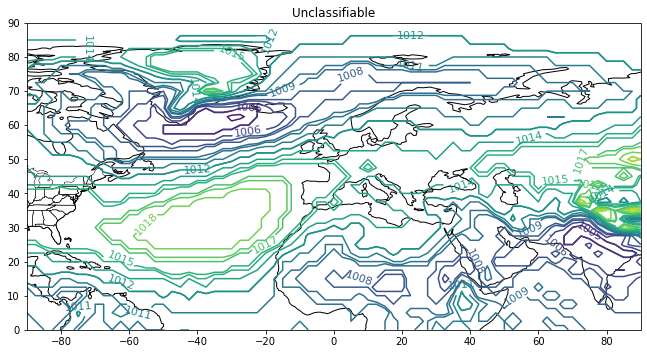

In [44]:
contour = get_ctr_plt('š')
plt.clabel(contour, **slp_clabels)
plt.title('Unclassifiable')

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

mlp_cols = mlp_df.columns
X = master_df[mlp_cols]
std_mlp_df = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit_transform(std_mlp_df)

array([[ 3.00577959e+01,  1.05400524e+01,  9.21766407e+00, ...,
        -2.33450552e-15, -1.46899589e-15, -3.28822495e-18],
       [ 3.29729624e+01,  9.89219864e+00,  2.22884374e+01, ...,
        -7.81431566e-16,  4.80281560e-16, -1.55409971e-16],
       [ 3.26437105e+01,  8.77745418e+00,  2.96688682e+01, ...,
        -2.19225328e-15,  7.46607738e-16,  1.93527232e-16],
       ...,
       [ 3.85493049e+01, -1.72224078e+01, -9.22806186e-01, ...,
         2.68914001e-16, -1.20035258e-17, -3.13231974e-17],
       [ 3.58277386e+01, -2.24166518e+01,  4.98434785e+00, ...,
        -5.28802100e-17,  2.14649205e-17, -2.33386612e-17],
       [ 3.25177196e+01, -1.87415580e+01,  1.31441463e+01, ...,
        -1.28041243e-16,  6.41526622e-17, -1.81166519e-17]])

Text(0, 0.5, 'Cumulative Explained Variance')

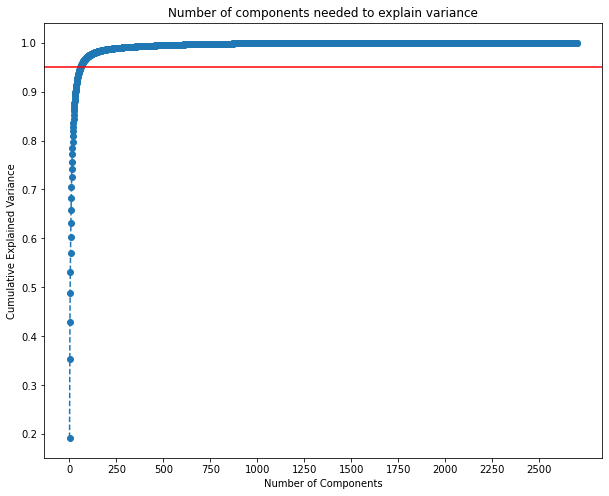

In [46]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,2702), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle ='--')
plt.xticks(np.arange(0, 2701, step=250)) 
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Number of components needed to explain variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [47]:
pca = PCA(n_components = 50)
df_after_PCA = pca.fit_transform(std_mlp_df)

In [48]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits = 5)
y = master_df['gwl_type']
grid_searches = {}
acc_scores = {}

In [49]:
from sklearn.model_selection import GridSearchCV
from numpy import mean

def fit(model, params, X, y, x_test, y_test):
    (key, value), = model.items() 
    print("Running GridSearchCV for %s." % key)
    gs = GridSearchCV(value, params, cv=5, n_jobs=-1,
                      verbose=2, scoring=None, refit=True,
                      return_train_score=True)
    result = gs.fit(X,y)
    best_model = result.best_estimator_
    yhat = best_model.predict(x_test)
    acc = accuracy_score(y_test, yhat)
    print('ACC : %.3f '%acc)
    grid_searches[key] = gs  
    
    if not len(acc_scores) == 0:
        acc_scores[key].append(acc)  
    else:
        acc_scores[key] = list()
        acc_scores[key].append(acc)

def score_summary(sort_by='mean_score'):
    def row(key, scores, params):
        d = {
             'estimator': key,
             'min_score': min(scores),
             'max_score': max(scores),
             'mean_score': np.mean(scores),
             'std_score': np.std(scores),
        }
        return pd.Series({**params,**d})

    rows = []
    for k in grid_searches:
        print(k)
        print("Acc:%.3f"%mean(acc_scores[k]))
        print(grid_searches[k].best_params_)
        params = grid_searches[k].cv_results_['params']
        scores = []
        for i in range(grid_searches[k].cv):
            key = "split{}_test_score".format(i)
            r = grid_searches[k].cv_results_[key]        
            scores.append(r.reshape(len(params),1))

        all_scores = np.hstack(scores)
        for p, s in zip(params,all_scores):
            rows.append((row(k, s, p)))

    df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

    columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
    columns = columns + [c for c in df.columns if c not in columns]
    return df[columns]

def best_model_score():
    rows = []
    for k in grid_searches:
        rows.append([k, mean(acc_scores[k]), grid_searches[k].best_params_])

    columns = ['estimator', 'mean_score', 'best_params']
    best_model_df = pd.DataFrame(rows, columns = columns)
    return best_model_df

def fit_folds(model, param):
    i = 1
    for train_index, test_index in tscv.split(df_after_PCA):
        X_train, X_test = df_after_PCA[train_index, :], df_after_PCA[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        print("Running Fold ", i)
        fit(model, param, X_train, y_train, X_test, y_test)
        i = i + 1

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

lgr = {'LogisticRegression': LogisticRegression(multi_class='multinomial', max_iter = 20000)}
svc = { 'SVC': SVC(random_state=4, kernel='rbf')}
rf = {'RandomForestClassifier': RandomForestClassifier(random_state=4, warm_start=True)}
dt = {'DecisionTreeClassifier': DecisionTreeClassifier(random_state=1)}
gbc = {'GradientBoostingClassifier': GradientBoostingClassifier(random_state=4, subsample=0.8, max_features="auto", warm_start=True)}
knn = {'KNN': KNeighborsClassifier()}
gnb = {'GaussianNB':  GaussianNB()}

lgr_param = [{'penalty': ['l2'],'solver': ['saga'], 'C': np.power(10., np.arange(-4, 4))}]
svc_param = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
        {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}
    ]
rf_param = [{"criterion":["gini", "entropy", "log2"],"max_depth": [100],
         "min_samples_leaf": range(1,30,2), "n_estimators": [200]}]
dt_param = [{'max_depth': list(range(1, 10)) + [None],'criterion': ['gini', 'entropy']}]
gbc_param = [{"learning_rate":[0.001,0.01,0.1], "n_estimators":range(1000,3000,200)}]
knn_param = [{'n_neighbors': list(range(1, 30)),'p': [1, 2], 'leaf_size' : list(range(1,50))}]
gnb_param = [{'var_smoothing': np.logspace(0,-9, num=100)}]

# Multinomial Logistic Regression

In [ ]:
lgr = {'LogisticRegression': LogisticRegression(multi_class='multinomial', max_iter = 20000)}
lgr_param = [{'penalty': ['l2'],'solver': ['saga'], 'C': np.power(10., np.arange(-4, 4))}]
fit_folds(lgr, lgr_param)

Running Fold  1
Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


# Support Vector Machine

In [ ]:
fit_folds(svc, svc_param)

Running Fold  1
Running GridSearchCV for SVC.
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 673.5min finished


ACC : 0.329 
Running Fold  2
Running GridSearchCV for SVC.
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 425.2min


# Random Forest Classifier

In [87]:
fit_folds(rf, rf_param)

Running Fold  1
Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  3.8min finished


ACC : 0.252 
Running Fold  2
Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  7.6min finished


ACC : 0.256 
Running Fold  3
Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 12.4min finished


ACC : 0.249 
Running Fold  4
Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 17.6min finished


ACC : 0.248 
Running Fold  5
Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 23.0min finished


ACC : 0.290 


# Decision Tree Classifier

In [79]:
fit_folds(dt, dt_param)

Running Fold  1
Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


ACC : 0.180 
Running Fold  2
Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s finished


ACC : 0.155 
Running Fold  3
Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.2s finished


ACC : 0.166 
Running Fold  4
Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.8s finished


ACC : 0.174 
Running Fold  5
Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.3s finished


ACC : 0.216 


# Gradient Boosting Classifier

# K-Neighbours Classifier

In [80]:
fit_folds(knn, knn_param)

Running Fold  1
Running GridSearchCV for KNN.
Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

ACC : 0.211 
Running Fold  2
Running GridSearchCV for KNN.
Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 77.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 85.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 95.9min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 107.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 118.4min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 128.9min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 140.2min
[Parallel(n_jobs=-1)]: Done 9097 tasks     

ACC : 0.220 
Running Fold  3
Running GridSearchCV for KNN.
Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 77.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 107.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 131.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 157.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 179.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 203.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 230.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 253.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 277.9min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 305.2min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 334.5min
[Parallel(n_jobs=-1)]: Done 9097 task

ACC : 0.242 
Running Fold  4
Running GridSearchCV for KNN.
Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 90.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 144.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 187.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 229.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 268.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 314.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 353.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 396.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 444.1min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 493.1min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 540.7min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 592.2min
[Parallel(n_jobs=-1)]: Done 9097 tas

ACC : 0.241 
Running Fold  5
Running GridSearchCV for KNN.
Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 49.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 118.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 185.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 242.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 312.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 368.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 433.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 503.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 567.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 639.3min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 716.6min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 798.8min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 877.7min
[Parallel(n_jobs=-1)]: Done 9097 ta

ACC : 0.247 


# Gaussian Naive Bayes Classifier

In [78]:
fit_folds(gnb, gnb_param)

Running Fold  1
Running GridSearchCV for GaussianNB.
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.9s finished


ACC : 0.228 
Running Fold  2
Running GridSearchCV for GaussianNB.
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.5s finished


ACC : 0.281 
Running Fold  3
Running GridSearchCV for GaussianNB.
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.1s finished


ACC : 0.297 
Running Fold  4
Running GridSearchCV for GaussianNB.
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   41.2s finished


ACC : 0.283 
Running Fold  5
Running GridSearchCV for GaussianNB.
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   55.8s finished


ACC : 0.310 


In [88]:
best_model_score()

estimator  mean_score  \
0      LogisticRegression    0.359842   
1                     SVC    0.377917   
2              GaussianNB    0.310220   
3  DecisionTreeClassifier    0.215577   
4                     KNN    0.247453   
5  RandomForestClassifier    0.290174   

                                         best_params  
0    {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}  
1         {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}  
2             {'var_smoothing': 0.03511191734215131}  
3              {'criterion': 'gini', 'max_depth': 6}  
4        {'leaf_size': 1, 'n_neighbors': 28, 'p': 2}  
5  {'criterion': 'gini', 'max_depth': 100, 'min_s...